In [32]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [33]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ACC', 'ADSK', 'ALGN', 'AMD', 'AMZN', 
    'ANET', 'APPH', 'ARVL', 'AXON', 'BBY','BROS', 'BYND', 'CDNS',
    'COIN', 'COUR', 'CRWD', 'DDOG', 'DKNG', 'DOCU', 'DUOL', 'EDIT',
    'ETSY', 'EVGO', 'FTCH', 'FUV', 'FVRR', 'GH', 'GMED', 'GOOG', 'INTG',
    'ISRG', 'JD', 'LSPD', 'LULU','MDB', 'MEDP', 'MELI', 'MNST', 'MSFT',
    'MTCH', 'NVCR', 'NVDA', 'NYT', 'OKTA', 'OPEN', 'PANW', 'PINS',
    'PTON', 'PUBM', 'QDEL', 'RBLX', 'RDFN', 'RGEN', 'ROKU', 'ROST',
    'SE', 'SHOP', 'SOLO', 'SPGI', 'SPLK', 'SQ', 'TASK', 'TDOC','TEAM',
    'TREX', 'TRUP', 'TSLA', 'TTD', 'TTWO', 'TWLO', 'TWTR', 'UPST',
    'VEEV', 'WDAY', 'WK', 'XPEV', 'ZEN', 'ZNGA']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

81

In [34]:
N_YEARS = 5
N_DAYS = int(round(365.25 * N_YEARS))
TODAY = (datetime.now() + timedelta(1)).date()
START = str(TODAY - timedelta(N_DAYS))
START, TODAY

('2016-12-24', datetime.date(2021, 12, 24))

In [35]:
batch = SYMBOLS + INDICES # run all
stock_loader = Loader(batch, START, verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  84 of 84 completed
Generating derived columns...
   ...AAPL
   ...ABMD
   ...ABNB
   ...ACC
   ...ADSK
   ...ALGN
   ...AMD
   ...AMZN
   ...ANET
   ...APPH
   ...ARVL
   ...AXON
   ...BBY
   ...BROS
   ...BYND
   ...CDNS
   ...COIN
   ...COUR
   ...CRWD
   ...DDOG
   ...DKNG
   ...DOCU
   ...DUOL
   ...EDIT
   ...ETSY
   ...EVGO
   ...FTCH
   ...FUV
   ...FVRR
   ...GH
   ...GMED
   ...GOOG
   ...INTG
   ...ISRG
   ...JD
   ...LSPD
   ...LULU
   ...MDB
   ...MEDP
   ...MELI
   ...MNST
   ...MSFT
   ...MTCH
   ...NVCR
   ...NVDA
   ...NYT
   ...OKTA
   ...OPEN
   ...PANW
   ...PINS
   ...PTON
   ...PUBM
   ...QDEL
   ...RBLX
   ...RDFN
   ...RGEN
   ...ROKU
   ...ROST
   ...SE
   ...SHOP
   ...SOLO
   ...SPGI
   ...SPLK
   ...SQ
   ...TASK
   ...TDOC
   ...TEAM
   ...TREX
   ...TRUP
   ...TSLA
   ...TTD
   ...TTWO
   ...TWLO
   ...TWTR
   ...UPST
   ...VEEV
   ...WDAY
   ...WK
   ...XPEV
   ...ZEN
   ...ZNGA
   ...^GSPC
   ...^IXIC
  

In [36]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       0.991643
2       0.999707
3       0.995363
4       1.008487
5       1.005722
          ...   
1251    1.016348
1252    0.991257
1253    0.989712
1254    0.988612
1255    1.017778
Name: ^GSPC, Length: 1255, dtype: float64

In [37]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,0.995451
2,1.003877
3,0.998518
4,1.015575
5,1.030847
...,...
1251,1.033022
1252,0.992263
1253,1.036819
1254,0.993305


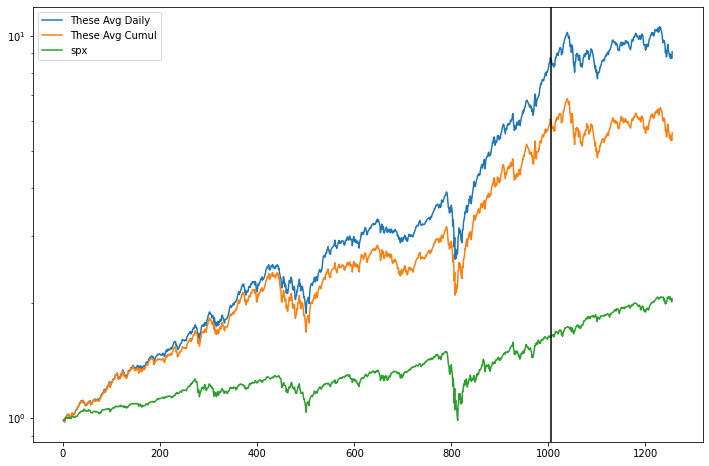

In [38]:
plt.figure(figsize=[12, 8])
plt.plot(data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
         label='These Avg Daily')
plt.plot(data['DayToDayChange'].cumprod().mean(axis=1),
         label='These Avg Cumul')
#plt.plot(data['DayToDayChange']
#         .quantile(q=[0.52], axis=1)
#         .T[1:]
#         .cumprod(), 
#         label='52')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

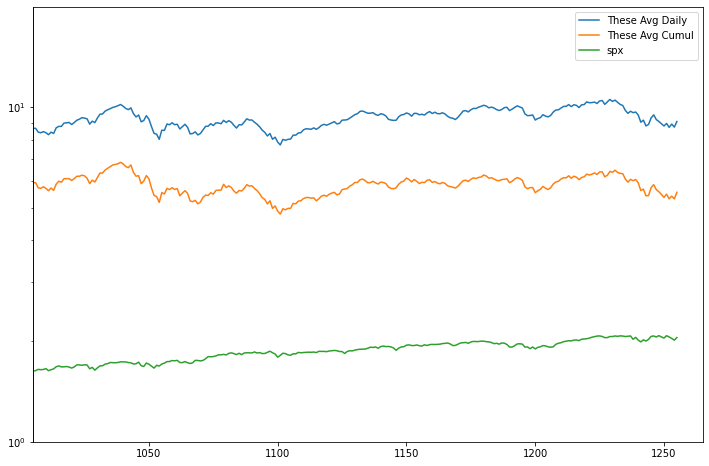

In [39]:
plt.figure(figsize=[12, 8])
plt.plot(data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
         label='These Avg Daily')
plt.plot(data['DayToDayChange'].cumprod().mean(axis=1),
         label='These Avg Cumul')
#plt.plot(data['DayToDayChange']
#         .quantile(q=[0.52], axis=1)
#         .T[1:]
#         .cumprod(), 
#         label='52')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim([10 ** 0, 10 ** 1.3])
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    return sub

In [10]:
rblx = get_stock_data('RBLX', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
1057,69.500000,69.500000,74.830002,60.500000,64.500000,4.241327,1.077519,NaN,NaN
1058,73.900002,73.900002,77.779999,70.129997,74.930000,4.302713,0.986254,1.063309,1.078130
1059,69.699997,69.699997,72.959999,69.110001,72.470001,4.244200,0.961777,0.943166,0.980650
1060,72.150002,72.150002,74.059998,66.250000,70.019997,4.278747,1.030420,1.035151,1.004591
1061,77.000000,77.000000,78.000000,73.180000,73.730003,4.343805,1.044351,1.067221,1.021899


In [11]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
1057,69.500000,69.500000,74.830002,60.500000
1058,73.900002,73.900002,77.779999,70.129997
1059,69.699997,69.699997,72.959999,69.110001
1060,72.150002,72.150002,74.059998,66.250000
1061,77.000000,77.000000,78.000000,73.180000


In [12]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
1057,69.500000,69.500000,74.830002,60.500000,77.779999,70.129997,1.119137,1.009065
1058,73.900002,73.900002,77.779999,70.129997,72.959999,69.110001,0.987280,0.935183
1059,69.699997,69.699997,72.959999,69.110001,74.059998,66.250000,1.062554,0.950502
1060,72.150002,72.150002,74.059998,66.250000,78.000000,73.180000,1.081081,1.014276
1061,77.000000,77.000000,78.000000,73.180000,79.099998,74.889999,1.027273,0.972597


0.05    0.98916
Name: HighMult, dtype: float64


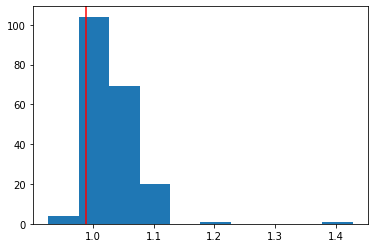

In [13]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.0110026948170887


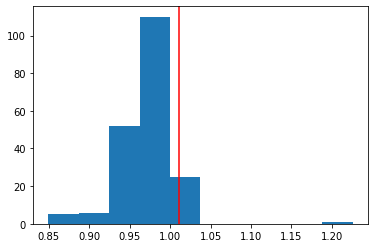

In [14]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [15]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [16]:
get_hilo_mult(rblx)

(1.0110026948170887, 0.989160408678236)

In [17]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0094942974905672, 0.9934605583190288)

In [18]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [19]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
1057,69.500000,69.500000,74.830002,60.500000,77.779999,70.129997,1.119137,1.009065,0
1058,73.900002,73.900002,77.779999,70.129997,72.959999,69.110001,0.987280,0.935183,1
1059,69.699997,69.699997,72.959999,69.110001,74.059998,66.250000,1.062554,0.950502,0
1060,72.150002,72.150002,74.059998,66.250000,78.000000,73.180000,1.081081,1.014276,1
1061,77.000000,77.000000,78.000000,73.180000,79.099998,74.889999,1.027273,0.972597,1


In [20]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [21]:
get_hilo_mults(rblx)

(1.0069286473861248,
 0.9880713979523865,
 1.0114593923227204,
 0.9898105737620551)

In [22]:
get_hilo_mults(aapl)

(1.0081160041377606,
 0.9962463707725927,
 1.0108161076551168,
 0.9891449612270369)

In [23]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=['stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
             'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.008116,0.996246,1.010816,0.989145
1,ABMD,1.004631,0.997307,1.006033,0.997282
2,ABNB,1.005371,0.994804,1.011216,0.990774
3,ACC,1.003241,0.996677,1.002913,0.997597
4,ADSK,1.005121,0.997071,1.008571,0.992706


In [24]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv